In [118]:
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
dFile = 'data/sfPer_s1_p1.txt';
sfIdx = 0;
conIdx = 1;
dispIdx = 2;
nInd = 3; # 3 indices per stimulus; add 3 to all of the above indices to get the equivalent value for the second stimulus
subjRespIdx = 2*nInd;

In [18]:
stim1 = 39; stim2 = 41; # subject responses (asked which stimulus has higher SF)

In [61]:
data = np.loadtxt(dFile); # nTrials x subjRespIdx

sfVals = np.union1d(np.unique(data[:, sfIdx]), np.unique(data[:, sfIdx+nInd]))
conVals = np.union1d(np.unique(data[:, conIdx]), np.unique(data[:, conIdx+nInd]))
dispVals = np.union1d(np.unique(data[:, dispIdx]), np.unique(data[:, dispIdx+nInd]))

In [33]:
allResp = data[:, subjRespIdx];
if any((allResp != stim1) & (allResp != stim2)):
    print('Problem: response which is neither 1 or 2')

In [36]:
s1g = data[:, sfIdx] > data[:, sfIdx+nInd];
s2g = data[:, sfIdx] < data[:, sfIdx+nInd]

In [127]:
# find which one is the reference (as opposed to test) grating
# there should really just be an indicator which tells you which is reference
ref = np.zeros(data.shape[0])
refSF = 4; refCon = 1;
ref[(data[:, sfIdx] == refSF) & (data[:, conIdx] == refCon)] = 1
ref[(data[:, nInd+sfIdx] == 4) & (data[:, nInd+conIdx] == 1)] = 2;

In [109]:
# did the subject perceive the test as higher SF?
testHF = np.zeros(data.shape[0]);
testHF[ref==1] = data[ref==1, subjRespIdx] == stim2;
testHF[ref==2] = data[ref==2, subjRespIdx] == stim1;

In [111]:
testSfs = np.zeros(data.shape[0])
testSfs[ref==1] = data[ref==1, nInd+sfIdx];
testSfs[ref==2] = data[ref==2, sfIdx];

In [112]:
ptSf = np.zeros(len(sfVals))
for sf in range(len(sfVals)):
    ptSf[sf] = sum(testHF[testSfs == sfVals[sf]]) / sum(testSfs==sfVals[sf])

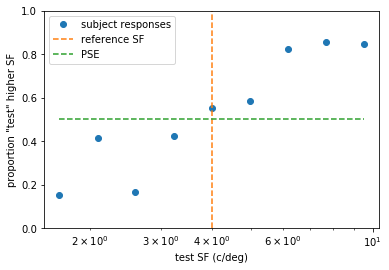

In [137]:
# now plot the PMF
pts = plt.semilogx(sfVals, ptSf, 'o'); ref= plt.semilogx([refSF, refSF], [0, 1], '--'); 
pse = plt.semilogx([sfVals[0], sfVals[-1]], [0.5, 0.5], '--')
plt.ylim([0, 1]);
plt.xlabel('test SF (c/deg)');
plt.ylabel('proportion "test" higher SF');
plt.legend((pts[0], ref[0], pse[0]), ('subject responses', 'reference SF', 'PSE'));

In [65]:
# was the subject correct?
corr1 = s1g & (allResp == stim1)
corr2 = s2g & (allResp == stim2)
corrOvr = corr1 | corr2

In [99]:
testCons = np.zeros(data.shape[0])
testCons[ref==1] = data[ref==1, nInd+conIdx];
testCons[ref==2] = data[ref==2, conIdx];

In [93]:
pCon = np.zeros(len(conVals))
for con in range(len(conVals)):
    pCon[con] = sum(corrOvr[testCons == conVals[con]]) / sum(testCons==conVals[con])

In [95]:
testSfs = np.zeros(data.shape[0])
testSfs[ref==1] = data[ref==1, nInd+sfIdx];
testSfs[ref==2] = data[ref==2, sfIdx];

In [96]:
pSf = np.zeros(len(sfVals))
for sf in range(len(sfVals)):
    pSf[sf] = sum(corrOvr[testSfs == sfVals[sf]]) / sum(testSfs==sfVals[sf])

In [97]:
pSf

array([ 0.85      ,  0.58823529,  0.83333333,  0.57894737,  0.        ,
        0.58333333,  0.82352941,  0.85714286,  0.84615385])